<a href="https://colab.research.google.com/github/Sheraz55/Deep-learning-assignments/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
from keras import models
from keras import layers
from numpy import nan as NA
dataset = pd.read_csv('/content/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239673 entries, 0 to 239672
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    239673 non-null  float64
 1   V1      239673 non-null  float64
 2   V2      239673 non-null  float64
 3   V3      239673 non-null  float64
 4   V4      239673 non-null  float64
 5   V5      239673 non-null  float64
 6   V6      239673 non-null  float64
 7   V7      239673 non-null  float64
 8   V8      239673 non-null  float64
 9   V9      239673 non-null  float64
 10  V10     239673 non-null  float64
 11  V11     239673 non-null  float64
 12  V12     239673 non-null  float64
 13  V13     239673 non-null  float64
 14  V14     239673 non-null  float64
 15  V15     239673 non-null  float64
 16  V16     239673 non-null  float64
 17  V17     239673 non-null  float64
 18  V18     239672 non-null  float64
 19  V19     239672 non-null  float64
 20  V20     239672 non-null  float64
 21  V21     23

In [ ]:
dataset.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [ ]:
dataset.fillna(0, inplace=True)

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.Class.value_counts()

0.0    239236
1.0       437
Name: Class, dtype: int64

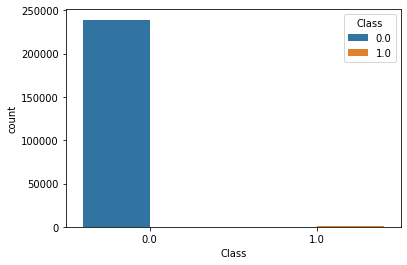

In [ ]:
import seaborn as sns
sns.countplot(x=dataset.Class, hue=dataset.Class)

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
Time_mean=dataset['Time'].mean(axis=0)
Time_std=dataset['Time'].std(axis=0)
dataset['Time']-=Time_mean
dataset['Time']/=Time_std

Amount_mean = dataset['Amount'].mean(axis=0)
Amount_std=dataset['Amount'].std(axis=0)
dataset['Amount']-=Amount_mean
dataset['Amount']/=Amount_std

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics = ['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=6, batch_size=100)

Epoch 1/6
1918/1918 [==============================] - 3s 2ms/step - loss: 7.6655e-04 - accuracy: 0.9997
Epoch 2/6
1918/1918 [==============================] - 3s 2ms/step - loss: 8.1299e-04 - accuracy: 0.9997
Epoch 3/6
1918/1918 [==============================] - 3s 2ms/step - loss: 5.2631e-04 - accuracy: 0.9999
Epoch 4/6
1918/1918 [==============================] - 3s 2ms/step - loss: 6.3574e-04 - accuracy: 0.9998
Epoch 5/6
1918/1918 [==============================] - 3s 2ms/step - loss: 7.2658e-04 - accuracy: 0.9998
Epoch 6/6
1918/1918 [==============================] - 3s 2ms/step - loss: 6.4563e-04 - accuracy: 0.9998


In [ ]:
results = model.evaluate(X_test,y_test)
results

1498/1498 [==============================] - 2s 988us/step - loss: 0.0061 - accuracy: 0.9994


[0.00611078180372715, 0.9994367361068726]